# Courses Materials application on the *Bike Sharing Dataset* 

### Goals

In this notebook, i'm going to do a preprocessing of the __hourly__ bike dataset provided by bangkit academy. There are several objectives to be reached:
1. What does the dataframe look like?
2. Analyze the data type.
3. are there any correlated variables?
4. What does it look like with dimentional reduction?
5. is there any outlier?
6. What does the the dataframe say intentionally?

#### Platform and PY version

Given below the system platform and python version which the notebook was run.

In [1]:
import sys
import platform

print(sys.version)
print(platform.platform())

3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
Windows-10-10.0.22621-SP0


#### Packages

What do these mean?

* Numpy             : A verstile package that helps vectors and matrices computation or indexing
* Matplotlib.pyplot : Used for visualization
* Seaborn           : Almost as the same as matplotlib, though. seaborn simplifies several processes where you don't need to do things manually.
* Pandas            : Generally used pacakge for data wrangling.
* Scikit-learn      : Package's used mainly for statistical / machbine learning purposes. Though, we'll just call the `PCA()` class only in this notebook.
* Scipy             : used for scientific computing and technical computing, however. We'll just call the `stats()` class only.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

## Start of Preprocessing

This notebook's only used for *preprocessing*. Hence, this notebook will be seperated into 3 parts:
1. Data input;
2. Assessing and cleaning data;
3. visualization and exploration.

### Input Data

For this preprocessing assignment, we'll just use the __hour.csv__.
Data's read by calling `pd.read_csv()`

In [12]:
DIR_PATH = "data/"
df=pd.read_csv(DIR_PATH+"hour.csv")

In [14]:
df.iloc[:,2:].corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


### Assesing and Cleaning

In this part, dataframe will be examined with the built in `pandas` function. I.e., `pd.head()` in which first 5 rows of the dataframe will be shown.

In [4]:
df.head()           # Show the first 5 indexes of each column

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The dataframe's consisted of 17 columns, judging by `dteday` column, we can say the data falls into time series category. The reason's due to the data points are collected or recorded in chronological order.

Column `instant` might not be used during exploration, as it's just an indexing for each row and doesn't have anything to do with the dataset. And thus, function `pd.drop()` will be used to remove the column.

In [5]:
df=df.drop("instant", axis=1)     # Remove column named instant

Afterwards, data with mising value will be checked with `pd.isna().sum()`. It's a combination of two function. I.e. `pd.isna()` and `pd.sum()`. The result of the function will give the total of missing value on each column.

In [19]:
list(df.isna().sum())       # Get total of missing value from each column

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Now, let's measure the central tendency and dispersion commonly used in statistics on the dataframe. Funtion `pd.describe()` will be called.

In [7]:
df.describe()       # Get summarization of the central tendency, dispersion and shape of a dataset's distribution

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Based from the `pd.describe()` function, most of the columns seem to be a numerical type, however those are categorical kind of data that has been converted into ordinal/binary. Therefore, we'll `pd.dtypes` to get a clear examination of what kind of data the columns are.

In [22]:
df.dtypes           # Get data type of each column

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

We could deduce that the dataframe's made mainly by integer type data. As for the reason that the dataframe's composed of a lot of categorical data that has been converted into either ordinal or binary.

### Exploration and Visualization

First thing first, in exploration we'll be calling `pd.corr()` to get a better understanding of each variables correlation. I.e. it quantifies the degree of linear relationship between two variables where the result that gets either 1 or -1 mean having a perfect linearity. And addition to that, we'll use a visualization function from seaborn named `seaborn.heatmap` to have a wider picture of the correlation.

C:\Users\Rhey\AppData\Local\Temp\ipykernel_34504\2047397865.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pd.DataFrame([[round(j, 3) for j in i] for i in df.corr().values], columns=df.columns[1:], index=df.columns[1:])


<Axes: >

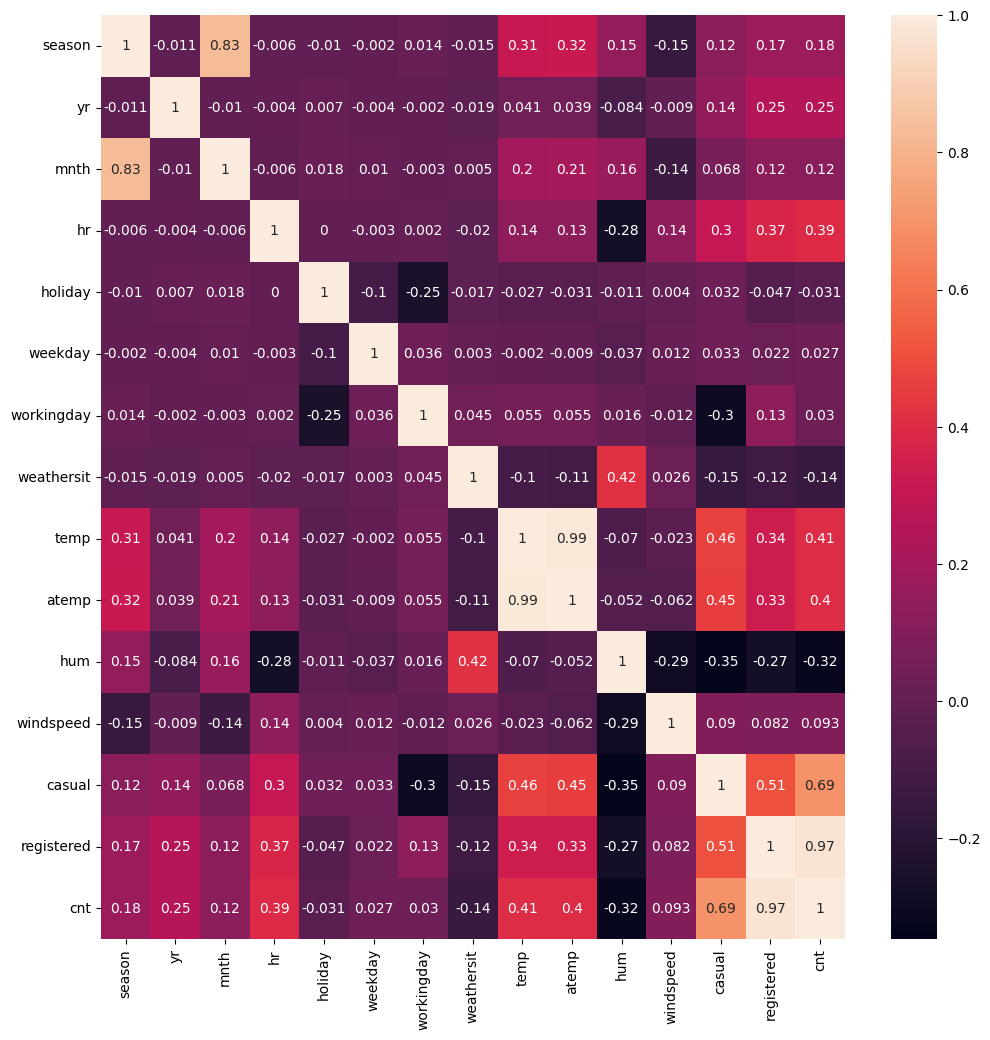

In [9]:
#Check correlation of each variable
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
corr = pd.DataFrame([[round(j, 3) for j in i] for i in df.corr().values], columns=df.columns[1:], index=df.columns[1:])
sns.heatmap(corr, annot=True)

From the pic above, we could tell that most of the variables are not correlated to each other. And thus, we'll be making a custom syntax to get two variables that have a correlation higher than 0.4.

In [49]:
#Get correlation higher than 0.4
colnames=corr.columns                                       # This get corr columns name
temp=[]
for i in range(1, len(corr)):
    for j in range(i):
        if abs(val:=corr.values[j][i]) > 0.4:               # Check if correlation is higher than 0.4, if yes. The value will be assigned to var variable.
            temp.append([colnames[j], colnames[i],val])
sorted(temp, key=lambda x:x[2], reverse=True)               # Sort from highest to lowest based from the correlation value

[['temp', 'atemp', 0.988],
 ['registered', 'cnt', 0.972],
 ['season', 'mnth', 0.83],
 ['casual', 'cnt', 0.695],
 ['casual', 'registered', 0.507],
 ['temp', 'casual', 0.46],
 ['atemp', 'casual', 0.454],
 ['weathersit', 'hum', 0.418],
 ['temp', 'cnt', 0.405],
 ['atemp', 'cnt', 0.401]]

1. `temp` and `atemp` have a high positive correlation of 0.988.
2. `registered` and `cnt` are strongly positively correlated with a coefficient of 0.972.
3. `season` and `mnth` exhibit a notable positive correlation of 0.83.
4. `casual` and `cnt` are moderately positively correlated with a coefficient of 0.695.
5. `casual` and `registered` show a moderate positive correlation of 0.507.
6. `temp` and `casual` have a moderate positive correlation of 0.46.
7. `atemp` and `casual` also have a moderate positive correlation, with a coefficient of 0.454.
8. `weathersit` and `hum` demonstrate a moderate positive correlation of 0.418.
9. `temp` and `cnt` have a moderate positive correlation of 0.405.
10. `atemp` and `cnt` exhibit a similar moderate positive correlation of 0.401.

In the next step, the dataframe will undergo a dimensional reduction in order to have a superior comprehension regarding of the dataframe, function `sklearn.decomposition.PCA()` will be called in order to change the data into 2 dimensional.

Text(0.5, 1.0, 'Data reduced into 2 dimension')

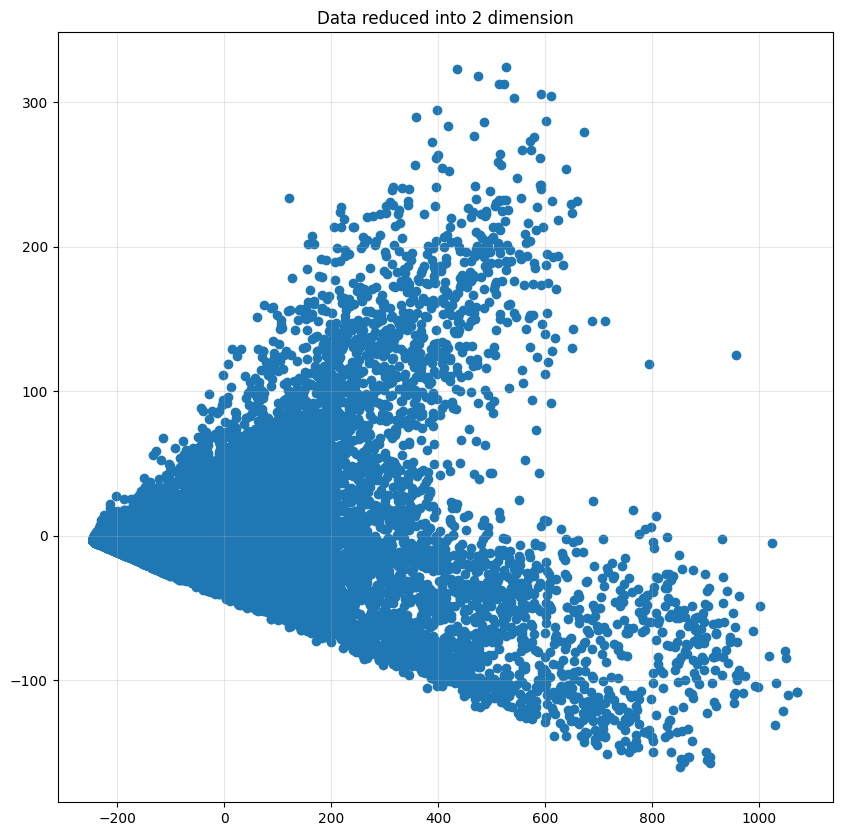

In [64]:
no_categorical = df.iloc[:,1:]
thepca = PCA(2)
thepca.fit(no_categorical)
df_reduced = thepca.transform(no_categorical)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.grid("on", alpha=0.3)
ax.scatter(df_reduced[0:,0], df_reduced[0:,1])
ax.set_title("Data reduced into 2 dimension")

Observation seems to be cramped on $-250<x<400$ and $-100<y<100$. Thus, we'll be seeing which observations are considered outliers and which ones are not.

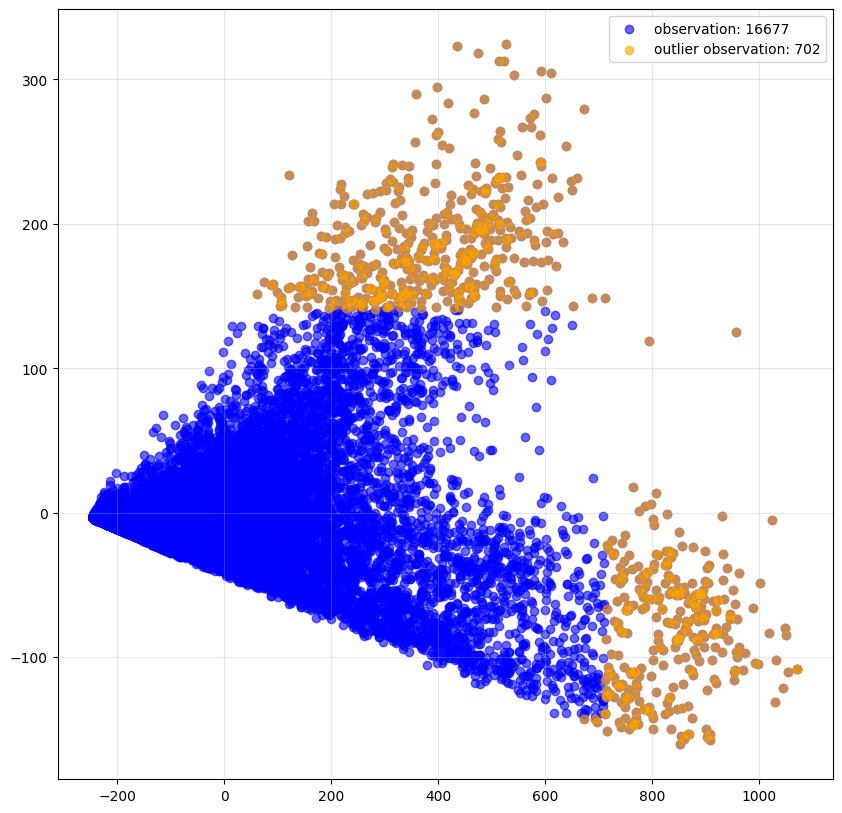

In [76]:
idk=pd.DataFrame(df_reduced)
# Calculate Z-scores for each column
z_scores_column1 = stats.zscore(idk[0])
z_scores_column2 = stats.zscore(idk[1])

threshold = 3
# Identify rows with at least one outlier in either column
outliers_rows = idk[(abs(z_scores_column1) > threshold) | (abs(z_scores_column2) > threshold)]

#visualization
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.grid("on", alpha=0.3)
ax.scatter(df_reduced[0:,0], df_reduced[0:,1], c="blue", alpha=0.6, label=f'observation: {len(df_reduced)-len(outliers_rows)}')
ax.scatter(outliers_rows[0], outliers_rows[1], c="orange", alpha=0.6, label=f'outlier observation: {len(outliers_rows)}')
ax.legend(loc="upper right")

## Summary

the data that's used on this notebook is considered as time series due to the data's collected or recorded over a sequence of time intervals. The dataset's consisted of 17 columns ('dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt') where they appear as numerical at first, however when we saw it deeply the type of many columns on the dataset are converted categorical type. On the exploration, it's clear that few variables correlate to each others. As there are only 10 column combinations in which their correlation is higher than 0.4. When we tried to reduce its dimension into a dimension where's possible to be visualized. It could be stated, there are also a lot of outliers on the dataset.